# SEPHI Algorithm Testing and Validation

This notebook tests and validates the Standard Exoplanet Planetary Habitability Index (SEPHI) algorithm using our cleaned NASA exoplanet dataset.

In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Add the project root to Python path
project_root = Path.cwd().parent.parent
sys.path.append(str(project_root))

# Import our SEPHI calculator
from data_science.algorithms.sephi import SEPHICalculator

# Set up plotting
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

In [8]:
# Load our cleaned dataset
df = pd.read_csv('../../data_science/datasets/nasa_clean.csv')
print(f"Loaded {len(df)} planets from cleaned dataset")

Loaded 46 planets from cleaned dataset


## Calculate SEPHI Scores

Let's calculate SEPHI scores for all planets in our dataset.

In [9]:
# Initialize SEPHI calculator
sephi = SEPHICalculator()

# Calculate SEPHI scores for all planets
sephi_scores = []
component_scores = []

for _, planet in df.iterrows():
    scores = sephi.calculate_sephi_score(
        equilibrium_temp=planet['pl_eqt'],
        radius=planet['pl_rade'],
        stellar_temp=planet['st_teff'],
        orbital_period=planet['pl_orbper'],
        mass=planet['pl_masse'] if 'pl_masse' in planet and not np.isnan(planet['pl_masse']) else None
    )
    sephi_scores.append(scores['sephi_score'])
    component_scores.append(scores['component_scores'])

# Add scores to dataframe
df['sephi_score'] = sephi_scores
df_components = pd.DataFrame(component_scores)
df = pd.concat([df, df_components], axis=1)

print("SEPHI Score Statistics:")
print(f"Mean: {df['sephi_score'].mean():.3f}")
print(f"Median: {df['sephi_score'].median():.3f}")
print(f"Max: {df['sephi_score'].max():.3f}")
print(f"\nNumber of highly habitable planets (score > 0.7): {(df['sephi_score'] > 0.7).sum()}")

SEPHI Score Statistics:
Mean: 0.214
Median: 0.204
Max: 0.526

Number of highly habitable planets (score > 0.7): 0


## Visualize SEPHI Components

Let's examine how different factors contribute to the overall habitability score.

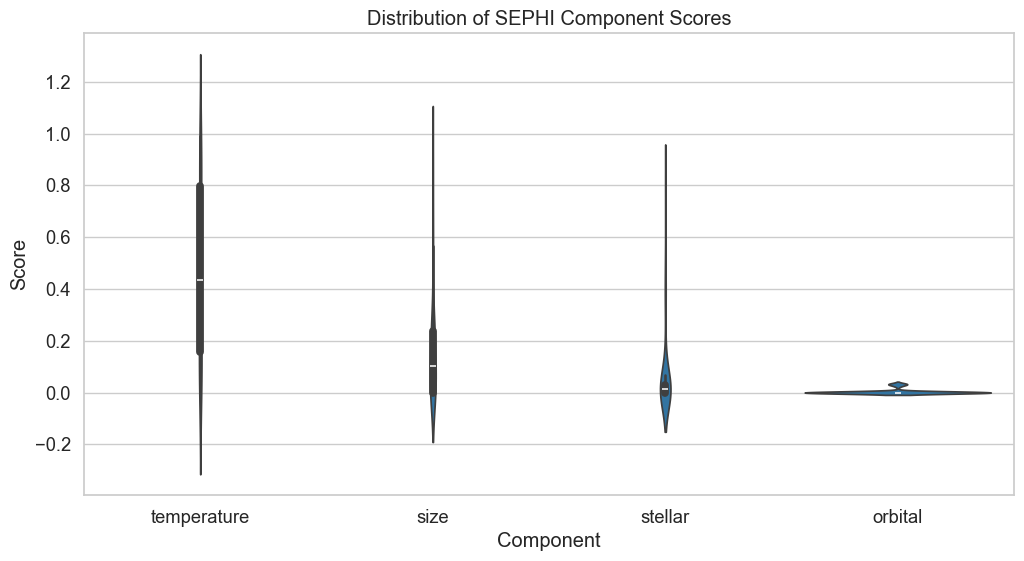

In [10]:
# Create a violin plot of component scores
component_data = df[['temperature', 'size', 'stellar', 'orbital']].melt()
plt.figure(figsize=(12, 6))
sns.violinplot(data=component_data, x='variable', y='value')
plt.title('Distribution of SEPHI Component Scores')
plt.xlabel('Component')
plt.ylabel('Score')
plt.show()

## Top Candidates by SEPHI Score

In [11]:
# Display top 10 planets by SEPHI score
columns = ['pl_name', 'sephi_score', 'temperature', 'size', 'stellar', 'orbital', 
          'pl_rade', 'pl_eqt', 'st_teff', 'pl_orbper', 'sy_dist']
print("Top 10 Most Promising Exoplanets:")
df.sort_values('sephi_score', ascending=False)[columns].head(10)

Top 10 Most Promising Exoplanets:


,pl_name,sephi_score,temperature,size,stellar,orbital,pl_rade,pl_eqt,st_teff,pl_orbper,sy_dist
30,"""TOI-700 e""",0.525977,0.8490,0.915310,0.0000,0.000000,0.949186,272.90,3482.0,27.809690,31.1265
24,"""TOI-700 d""",0.472800,0.8080,0.760000,0.0000,0.000000,1.144000,268.80,3461.0,37.424750,31.1265
32,"""TOI-712 d""",0.415213,0.9600,0.000000,0.3630,0.033064,2.038570,292.00,4504.0,84.838690,58.6212
27,"""TOI-2285 b""",0.399516,0.9908,0.210943,0.0000,0.000000,1.578114,287.08,3546.0,27.267202,42.4090
5,"""K2-3 d""",0.396150,0.9400,0.245000,0.0295,0.000000,1.510000,282.00,3896.0,44.559830,44.0727
36,"""TOI-2095 c""",0.374750,0.9100,0.225000,0.0000,0.000000,1.330000,297.00,3759.0,28.172320,41.9176
37,"""TOI-2095 c""",0.374749,0.8734,0.276238,0.0000,0.000000,1.447525,300.66,3746.0,28.172250,41.9176
6,"""K2-3 d""",0.360850,0.8280,0.271000,0.0165,0.000000,1.458000,305.20,3844.0,44.556030,44.0727
22,"""K2-133 e""",0.355750,0.9200,0.135000,0.0000,0.000000,1.730000,296.00,3655.0,26.584100,75.1703
26,"""TOI-2285 b""",0.352250,0.9600,0.065000,0.0000,0.000000,1.740000,284.00,3491.0,27.269550,42.4090


## SEPHI Score vs Planet Characteristics

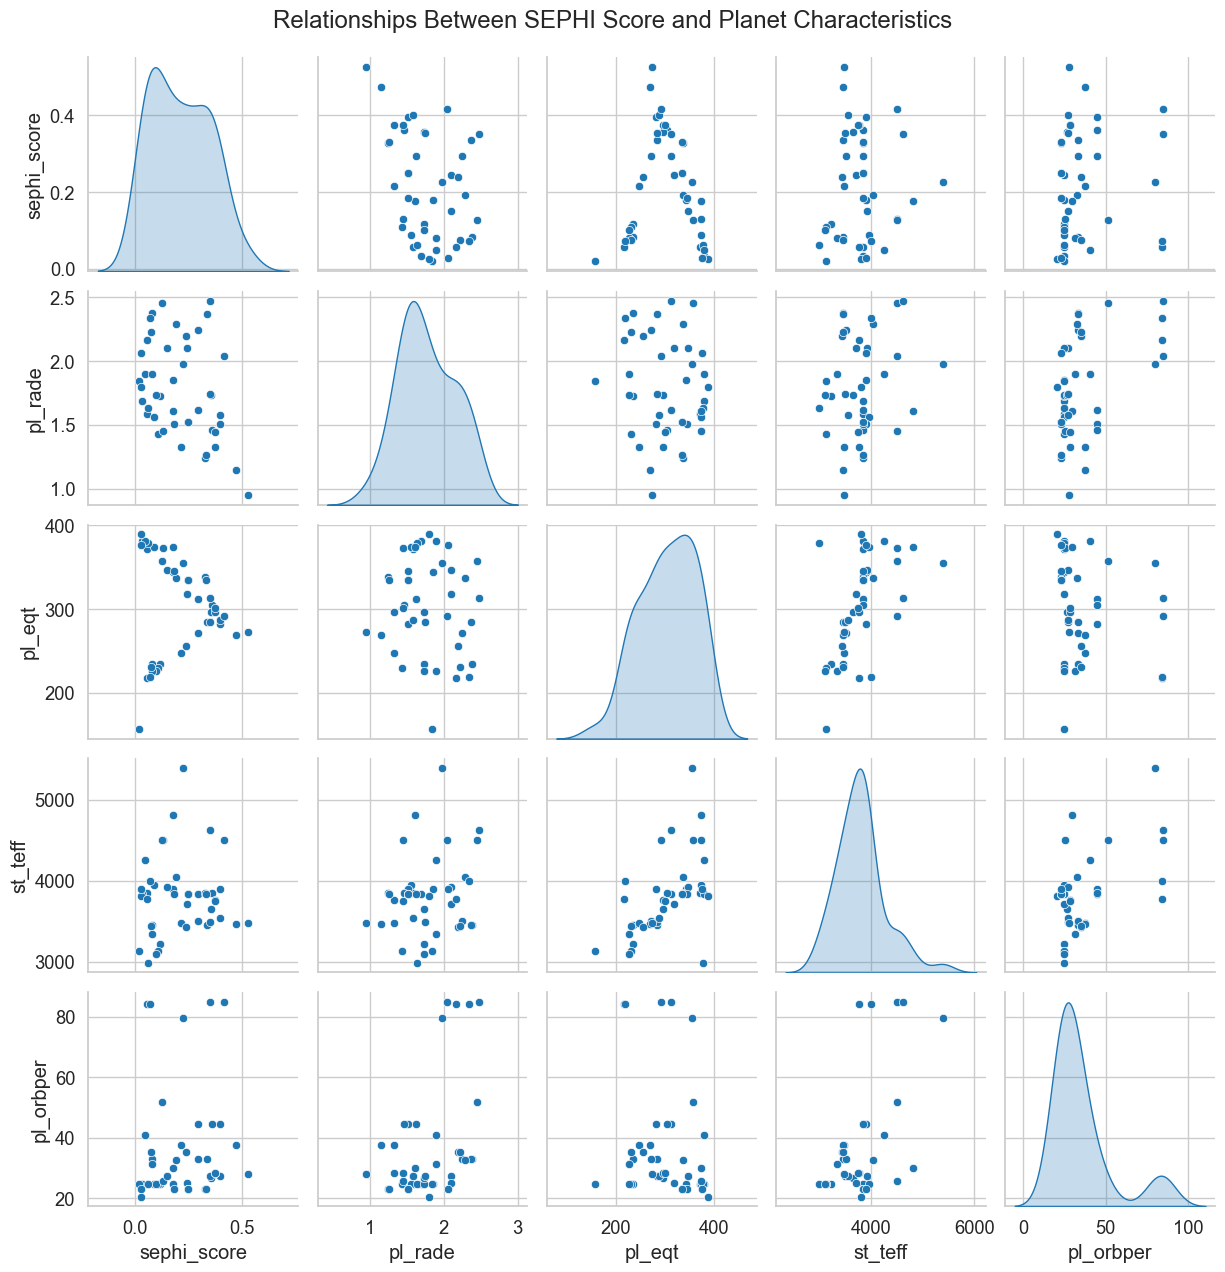

In [12]:
# Create a scatter plot matrix
features = ['sephi_score', 'pl_rade', 'pl_eqt', 'st_teff', 'pl_orbper']
sns.pairplot(df[features], diag_kind='kde')
plt.suptitle('Relationships Between SEPHI Score and Planet Characteristics', y=1.02)
plt.show()